# Final Project EDA

Nikki Aaron (na5zn)  
Kevin Hoffman (keh4nb)  
Ashley Scurlock (ams5zx)  
Siddharth Surapaneni (sss2ea)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data file
path = '../Data/Processed'
file = 'data_combined.csv'
df = pd.read_csv(f'{path}/{file}')


In [3]:
selected = df[['lat', 'lng', 'res_rate', 'dni', 'annual_kwh_used', 'temp_Apr', 'temp_Aug',
       'temp_Dec', 'temp_Feb', 'temp_Jan', 'temp_Jul', 'temp_Jun', 'temp_Mar',
       'temp_May', 'temp_Nov', 'temp_Oct', 'temp_Sep', 'pct_cloudy_days_Apr',
       'pct_cloudy_days_Aug', 'pct_cloudy_days_Dec', 'pct_cloudy_days_Feb',
       'pct_cloudy_days_Jan', 'pct_cloudy_days_Jul', 'pct_cloudy_days_Jun',
       'pct_cloudy_days_Mar', 'pct_cloudy_days_May', 'pct_cloudy_days_Nov',
       'pct_cloudy_days_Oct', 'pct_cloudy_days_Sep',
       'annual_output_kwh_20_sps', 'percent_current_needs_met',
       'dollars_saved']]
selected = df[['lat', 'lng', 'dni', 'temp_Jan',
       'pct_cloudy_days_Jan', 'annual_kwh_used', 'annual_output_kwh_20_sps', 'percent_current_needs_met',
       'res_rate', 'dollars_saved']]
selected.columns

response_col = 'dollars_saved'

In [31]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32634 entries, 0 to 32633
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lat                        32634 non-null  float64
 1   lng                        32634 non-null  float64
 2   dni                        32634 non-null  float64
 3   temp_Jan                   32634 non-null  float64
 4   pct_cloudy_days_Jan        32634 non-null  float64
 5   annual_kwh_used            32634 non-null  float64
 6   annual_output_kwh_20_sps   32634 non-null  float64
 7   percent_current_needs_met  32634 non-null  float64
 8   res_rate                   32634 non-null  float64
 9   dollars_saved              32634 non-null  float64
dtypes: float64(10)
memory usage: 2.5 MB


In [32]:
selected

,lat,lng,dni,temp_Jan,pct_cloudy_days_Jan,annual_kwh_used,annual_output_kwh_20_sps,percent_current_needs_met,res_rate,dollars_saved
0,42.06259,-72.62589,4.524000,41.7,65.30,18463.477410,3042.359745,0.164777,0.159252,484.503102
1,42.37492,-72.46210,4.470000,30.8,64.30,18463.477410,3042.215795,0.164769,0.169665,516.158909
2,42.39192,-72.52479,4.404000,29.1,65.30,18463.477410,3040.027769,0.164651,0.169665,515.787676
3,42.42017,-72.10615,4.578000,29.0,64.30,18463.477410,3046.525577,0.165003,0.169665,516.890130
4,42.27875,-72.40036,4.488000,29.1,64.30,18463.477410,3041.628223,0.164738,0.169665,516.059218
...,...,...,...,...,...,...,...,...,...,...
32629,46.06652,-118.88846,5.178000,55.9,85.80,18668.627159,2962.311134,0.158679,0.087373,258.825663
32630,46.80678,-118.31679,5.170286,55.9,86.65,18668.627159,2933.120407,0.157115,0.101544,297.842164
32631,46.08744,-117.25143,4.959429,54.8,86.20,18668.627159,2999.835424,0.160689,0.101544,304.616706
32632,46.19394,-117.14736,4.868000,54.8,86.20,18668.627159,2971.835276,0.159189,0.101544,301.773445


### Feature Statistics

In [37]:
selected.describe()

,lat,lng,dni,temp_Jan,pct_cloudy_days_Jan,annual_kwh_used,annual_output_kwh_20_sps,percent_current_needs_met,res_rate,dollars_saved
count,32634.000000,32634.000000,32634.000000,32634.000000,32634.000000,32634.000000,32634.000000,32634.000000,32634.000000,32634.000000
mean,38.803482,-90.467658,4.936682,37.756727,65.808005,20987.919978,3048.526423,0.151741,0.117800,359.020013
std,4.751916,13.699514,0.816116,12.238427,8.363365,3777.618654,75.201029,0.037980,0.028066,85.780949
min,24.585470,-124.628470,3.186000,9.600000,41.600000,10697.094055,2638.135073,0.095256,0.066667,205.427056
25%,35.464737,-97.027330,4.434000,30.000000,60.950000,18199.713447,3006.017436,0.129982,0.098805,301.304618
50%,39.495940,-88.118690,4.737600,36.000000,65.450000,22097.558678,3049.416957,0.140360,0.111249,338.401524
75%,42.077868,-80.238605,5.165833,45.900000,71.300000,23181.921637,3095.093323,0.166906,0.130176,393.816836
max,49.327610,-67.017920,8.280000,76.900000,86.800000,29248.492786,3392.151546,0.312033,0.384835,1186.186340


### Feature Distributions

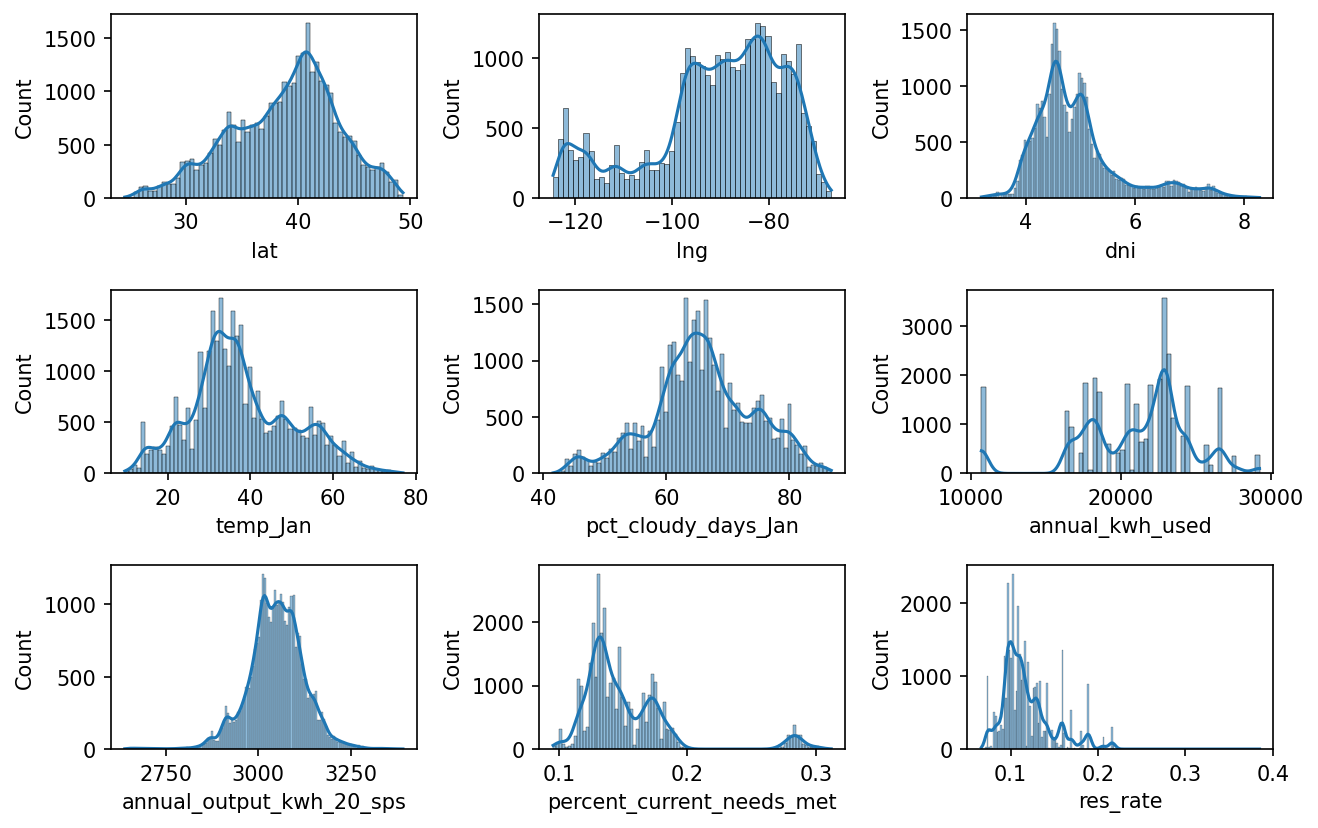

In [36]:
cols = [col for col in selected.columns if col not in response_col]

fig, axes = plt.subplots(3,3, figsize=(10,5), dpi=150)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
for ax, data, xlabel in zip(fig.axes,
                               [selected[col] for col in cols], cols):
    sns.histplot(data, ax=ax, kde=True)

In [69]:
cloud_melted = df[[col for col in df.columns if col.startswith('pct_cloudy_days')] + ['zip']]
cloud_melted.columns = [col[16:] for col in cloud_melted.columns if col.startswith('pct_cloudy_days')] + ['zip']
cloud_melted = cloud_melted[['zip', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
cloud_melted = cloud_melted.melt(id_vars=['zip'], var_name = 'month', value_name = 'pct_cloudy_days').reset_index(drop=True)

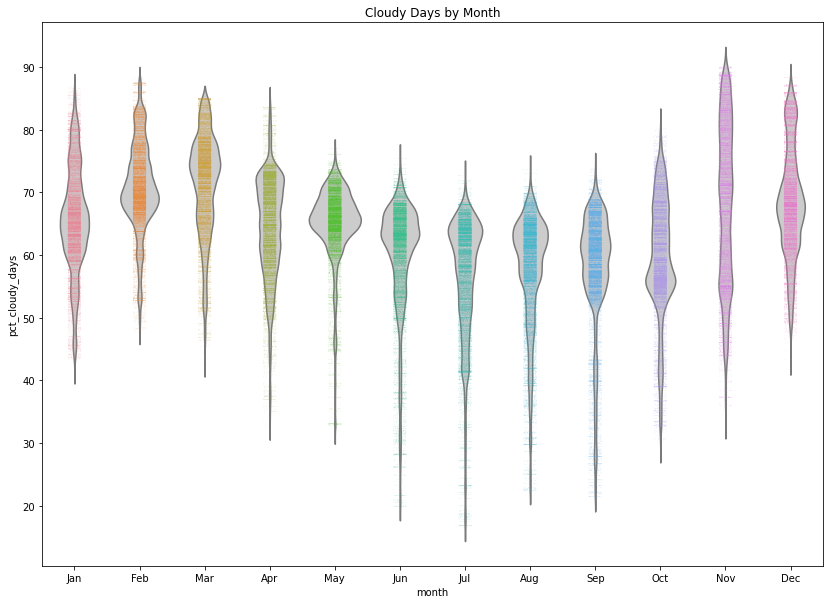

In [70]:
plt.figure(figsize=(14, 10))
plt.title('Cloudy Days by Month')
ax = sns.violinplot(x=cloud_melted['month'], y=cloud_melted['pct_cloudy_days'], inner=None, color=".8")
ax = sns.stripplot(x=cloud_melted['month'], y=cloud_melted['pct_cloudy_days'], jitter=True, size=0.25)

In [71]:
temp_melted = df[[col for col in df.columns if col.startswith('temp')] + ['zip']]
temp_melted.columns = [col[5:] for col in temp_melted.columns if col.startswith('temp')] + ['zip']
temp_melted = temp_melted[['zip', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
temp_melted = temp_melted.melt(id_vars=['zip'], var_name = 'month', value_name = 'temp').reset_index(drop=True)

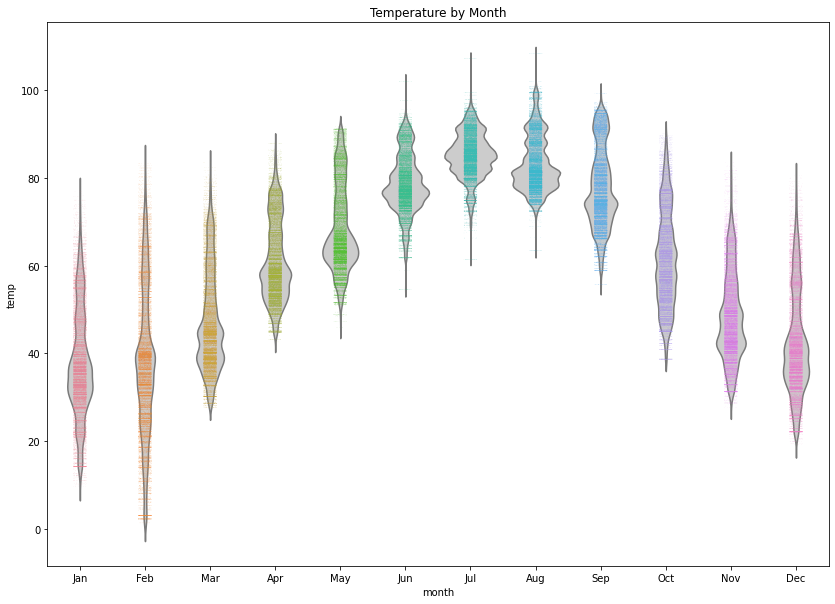

In [73]:
plt.figure(figsize=(14, 10))
plt.title('Temperature by Month')
ax = sns.violinplot(x=temp_melted['month'], y=temp_melted['temp'], inner=None, color=".8")
ax = sns.stripplot(x=temp_melted['month'], y=temp_melted['temp'], jitter=True, size=0.25)

### Correlations

In [8]:
corr = selected.corr()
corr.style.background_gradient(cmap='coolwarm')

,lat,lng,dni,temp_Jan,pct_cloudy_days_Jan,annual_kwh_used,annual_output_kwh_20_sps,percent_current_needs_met,res_rate,dollars_saved
lat,1.000000,0.008248,-0.475172,0.098054,0.552218,0.341396,-0.352010,-0.312874,0.100186,0.066526
lng,0.008248,1.000000,-0.626543,-0.230502,0.141526,0.357541,0.128363,-0.456523,-0.084817,-0.072351
dni,-0.475172,-0.626543,1.000000,0.106182,-0.714872,-0.533408,0.296135,0.614612,0.193291,0.223446
temp_Jan,0.098054,-0.230502,0.106182,1.000000,-0.077893,0.012033,0.021154,-0.070161,0.036031,0.037763
pct_cloudy_days_Jan,0.552218,0.141526,-0.714872,-0.077893,1.000000,0.293452,-0.442948,-0.316532,-0.151811,-0.196580
annual_kwh_used,0.341396,0.357541,-0.533408,0.012033,0.293452,1.000000,-0.166755,-0.949333,-0.345641,-0.361658
annual_output_kwh_20_sps,-0.352010,0.128363,0.296135,0.021154,-0.442948,-0.166755,1.000000,0.204469,-0.045759,0.053579
percent_current_needs_met,-0.312874,-0.456523,0.614612,-0.070161,-0.316532,-0.949333,0.204469,1.000000,0.390932,0.410990
res_rate,0.100186,-0.084817,0.193291,0.036031,-0.151811,-0.345641,-0.045759,0.390932,1.000000,0.994828
dollars_saved,0.066526,-0.072351,0.223446,0.037763,-0.196580,-0.361658,0.053579,0.410990,0.994828,1.000000
